# Anomaly detection

## Imports and functions

In [4]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras

from functools import partial
import re
import os

from tensorflow.keras import models

In [5]:
def load_files_list(directory):
    '''
    Load the audiofiles inside a directory.
    '''
    return os.listdir(directory)

In [6]:
def normalize(v):
    return (v - np.min(v)) / (np.max(v)-np.min(v))

## Loading the model

In [42]:
model = keras.models.load_model('convolucional3_eam0122.h5')
model.trainable = False

## Loading the dataset with anomalies

In [8]:
DIRECTORY = '/home/belen_alastruey/PYTHON/Autoencoder/'

In [9]:
anomalies_path = DIRECTORY + 'DescriptorsAnomalies/'

In [10]:
files = load_files_list(anomalies_path)

### Read .npy

In [11]:
descriptors_anomalies = []
labels = []
for file in files:
    if "fan" in file:
        descr = np.load(anomalies_path + file)
        descriptors_anomalies.append(descr)
        labels.append(re.split(r'_', file)[1])

In [12]:
normalized=[]
for v in descriptors_anomalies:
    normalized.append(normalize(v))

In [13]:
descr = np.asarray(normalized)

In [14]:
#descr = np.asarray(descriptors_anomalies)
labels = np.asarray(labels)

In [15]:
descr.shape

(1418, 1, 128)

### Train - Test split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(descr,labels,test_size=0.3, stratify = labels, random_state=100 )

In [19]:
X_train.shape

(992, 1, 128)

In [20]:
y_train.shape

(992,)

In [21]:
X_test.shape

(426, 1, 128)

In [22]:
#NOMES PEL CONVOLUCIONAL
X_train = X_train.reshape(X_train.shape[0],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[2],1)

### Predictions

In [23]:
pred = model.predict(X_train)

### Getting the reconstruction error

In [27]:
errors_eam=[]
errors_mse=[]

In [53]:
#NO CONVOLUCIONAL
for i in range(X_train.shape[0]):
    eam=[]
    mse=[]
    for coef, coef_pred in zip(X_train[i][0], pred[i][0]):
        eam.append(abs(coef-coef_pred))
        mse.append((coef-coef_pred)**2)
        
    errors_eam.append(np.mean(eam))
    errors_mse.append(np.mean(mse))
    
errors_eam= np.asarray(errors_eam)
errors_mse= np.asarray(errors_mse)

In [28]:
#CONVOLUCIONAL
for i in range(X_train.shape[0]):
    eam=[]
    mse=[]
    for coef, coef_pred in zip(X_train[i], pred[i]):
        eam.append(abs(coef-coef_pred))
        mse.append((coef-coef_pred)**2)
        
    errors_eam.append(np.mean(eam))
    errors_mse.append(np.mean(mse))
    #print("EAM is", np.mean(eam))
    #print("MSE is", np.mean(mse))
    
errors_eam= np.asarray(errors_eam)
errors_mse= np.asarray(errors_mse)

In [29]:
errors = []
for vector, vector_pred in zip(X_train, pred) :
    e = np.linalg.norm(vector-vector_pred) #distancia entre els dos punts 
    errors.append(e)

In [30]:
errors = np.asarray(errors)

### Plots


In [31]:
from matplotlib import pyplot as plt

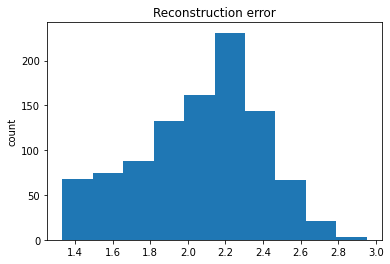

In [32]:
#tots els errors
plt.hist(errors)
plt.title('Reconstruction error')
plt.ylabel('count')

plt.show()

In [38]:
errors_normal = []
errors_abnormal = []
for e, label in zip(errors_mse, y_train): #errors_eam, errors_mse, errors
    if label == 'normal':
        errors_normal.append(e)
    else:
        errors_abnormal.append(e)

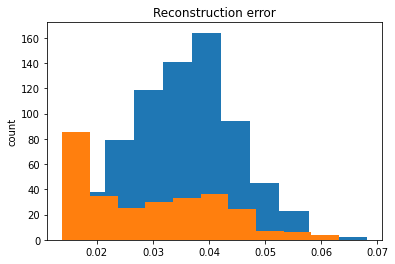

In [39]:
plt.hist(errors_normal)
plt.hist(errors_abnormal)
plt.title('Reconstruction error')
plt.ylabel('count')

plt.show()